In [1]:
import pandas as pd

##Variant 2
# 3, 4, 5, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 20, 22, 23, 27

In [ ]:
df = pd.read_csv('NationalNames.csv').dropna()

In [ ]:
# 3. Отримайте імена стовпців набору даних
df.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

In [ ]:
# 4. Отримайте загальну інформацію про дані у наборі даних.
df.describe()

,Id,Year,Count
count,708268.000000,708268.000000,708268.000000
mean,354134.500000,1936.367717,252.725649
std,204459.504567,22.582218,2047.597817
min,1.000000,1880.000000,5.000000
25%,177067.750000,1920.000000,7.000000
50%,354134.500000,1938.000000,13.000000
75%,531201.250000,1956.000000,38.000000
max,708268.000000,1970.000000,99680.000000


In [ ]:
# 5. Знайдіть кількість унікальних імен у наборі даних
df.drop_duplicates(subset = 'Name').count()['Count']

31426

In [ ]:
# 8. Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для якого Count максимальне)
df.query("Year == 1889").sort_values(by=['Count'], ascending=False)[:1]['Name']

20153    Mary
Name: Name, dtype: object

In [ ]:
# 9. Підрахуйте кількість записів, для яких Count - мінімальне у наборі.
df.query(f"Count == {df['Count'].min()}")['Count'].sum()

464400.0

In [ ]:
# 11. Знайдіть рік із найбільшою кількістю унікальних імен.
df.groupby('Name').filter(lambda d: d['Year'].unique().size == 1).groupby('Year')['Count'].sum().reset_index().sort_values(by='Count', ascending=False).iloc[0]

Year     1970.0
Count    4539.0
Name: 84, dtype: float64

In [ ]:
# 12. Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році)
df.query('Year == 1970').groupby('Name').sum().sort_values(by=['Count'], ascending=False)[:1]

,Id,Year,Count
Name,,,
Michael,1402997,3940,85778.0


In [ ]:
# 13. Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих імен
df.query('Gender == "F" and Name=="Jacob"').sort_values(by=['Count'], ascending=False)[:1]

,Id,Name,Year,Gender,Count
278655,278656,Jacob,1930,F,7.0


In [ ]:
# 14. Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові чоловічі та жіночі імена)
male = df.query('Gender == "M"')['Name'].drop_duplicates()
female = df.query('Gender == "F"')['Name'].drop_duplicates()
nosex_names = male[male.isin(female)]
df[df.Name.isin(nosex_names)].drop_duplicates(['Year', 'Name'])['Year'].value_counts().to_frame()

,Year
1957,2956
1961,2956
1962,2954
1969,2952
1959,2942
...,...
1884,1216
1882,1168
1883,1166
1880,1117


In [ ]:
# 16. Знайдіть рік, коли народилося найбільше дітей
df.groupby("Year").sum().sort_values(by='Count', ascending=False)[:1]['Count']

Year
1957    4200026.0
Name: Count, dtype: float64

In [ ]:
# 17. Знайдіть кількість дівчаток та хлопчиків, які народились кожного року
df.groupby(['Year', 'Gender'])['Count'].sum().to_frame()

Count
Year Gender           
1880 F         90993.0
     M        110491.0
1881 F         91954.0
     M        100745.0
1882 F        107850.0
...                ...
1968 M       1738928.0
1969 F       1686947.0
     M       1789732.0
1970 F       1748147.0
     M       1833886.0

[182 rows x 1 columns]

In [ ]:
# 18. Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків.
year_to_male = df.query('Gender == "M"').groupby('Year')['Count'].sum()
year_to_female = df.query('Gender == "F"').groupby('Year')['Count'].sum()
(year_to_female > year_to_male).sum()

54

<AxesSubplot:xlabel='Year'>

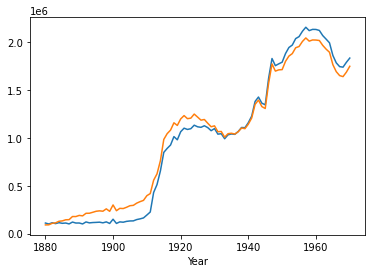

In [ ]:
# 19. Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік
male = df.query('Gender == "M"').groupby('Year').sum()['Count']
female = df.query('Gender == "F"').groupby('Year').sum()['Count']
male.plot()
female.plot()

In [ ]:
# 20. Підрахуйте кількість гендерно-нейтральних імен (однакових для дівчат та хлопців)
male = df.query('Gender == "M"')['Name'].drop_duplicates()
female = df.query('Gender == "F"')['Name'].drop_duplicates()
male.isin(female).sum()

3913

In [ ]:
# 22. Підрахуйте скільки років проводилось спостереження
df['Year'].unique().size

91

In [ ]:
# 23. Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року)
male = df.query('Gender == "M"')['Name'].drop_duplicates()
female = df.query('Gender == "F"')['Name'].drop_duplicates()
nosex_names = male[male.isin(female)]
years_count = df.Year.unique().size
df[df.Name.isin(nosex_names)].groupby('Name').filter(lambda d: d['Year'].unique().size == years_count).groupby('Name')['Count'].max().sort_values(ascending=False).to_frame()

,Count
Name,
Linda,99680.0
James,94755.0
Michael,92709.0
Robert,91642.0
John,88318.0
...,...
Bailey,50.0
Nevada,48.0
Lonie,44.0


In [ ]:
# 27. Знайти найпопулярніші імена в кожному році.
df.groupby(['Year']).apply(lambda d: d[d.Count == d.Count.max()].iloc[0][['Name', 'Count']]).reset_index()

,Year,Name,Count
0,1880,John,9655.0
1,1881,John,8769.0
2,1882,John,9557.0
3,1883,John,8894.0
4,1884,John,9388.0
...,...,...,...
86,1966,Michael,80002.0
87,1967,Michael,82454.0
88,1968,Michael,82019.0
89,1969,Michael,85227.0
